# Trends

Observation #1
there is negative relationship between the number of rides and the number of drivers in one side and the average fare price on the other side. the more the former increase, the more the latter decreases.
Urban areas are the highest in the number of drivers and highest in the number of rides,and the lowest in the average fare price, to be in the range of $20-$30.
Whereas suburban areas are less in the number of drivers number of rides and higher in average fare price, to be in the range of $30-$35. The same trend applies to rural areas, even more less in the number of drivers and number of rides, and even higher in average fare price. we can see on the bubble plot that it is ore concentrated in the range of $32-37 and it can reach up to $44. We can also relate the high price in rural areas to the far distances in the less populated areas, where the average errand mileage can be much higher than the average errand mileage in the more densely populated areas.


Trend #2
Total number of fares in Urban cities count to be the highest, 62.7%, in comparison to suburban areas, 30.5% and rural areas, 6.8%.

Trend #3
Total number of drivers in the Urban areas is the most, taking up to 80.9%, versus 2.6% for rural areas and 16.5% for suburban areas.

Trend #4
Total number of rides agrees with the total number of drivers. It is the most in the urban areas, 68.4%, versus 26.3% for suburban areas and 5.3% for rural areas.

Conclusion:
if someone wants to work as an uber driver, they should locate themselves in a highly populated urban area. they will for sure find good work there than in rural and suburban areas.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
cityDF = pd.read_csv("Resources/city_data.csv")
rideDF = pd.read_csv("Resources/ride_data.csv")

# Read the City and Ride Data
print(cityDF.head())
print(rideDF.head())

# Combine the data into a single dataset
cityride = pd.merge(cityDF, rideDF, on = 'city', how = 'outer')

# Display the data table for preview
cityride = cityride[["city", "date", "fare", "ride_id", "driver_count", "type"]]
cityride.head()

           city  driver_count   type
0   Richardfort            38  Urban
1  Williamsstad            59  Urban
2   Port Angela            67  Urban
3    Rodneyfort            34  Urban
4   West Robert            39  Urban
                 city                 date   fare        ride_id
0  Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873
1  South Michelleport  2018-03-04 18:24:09  30.24  2343912425577
2  Port Samanthamouth  2018-02-24 04:29:00  33.44  2005065760003
3          Rodneyfort  2018-02-10 23:22:03  23.44  5149245426178
4          South Jack  2018-03-06 04:28:35  34.58  3908451377344


,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


## Bubble Plot of Ride Sharing Data

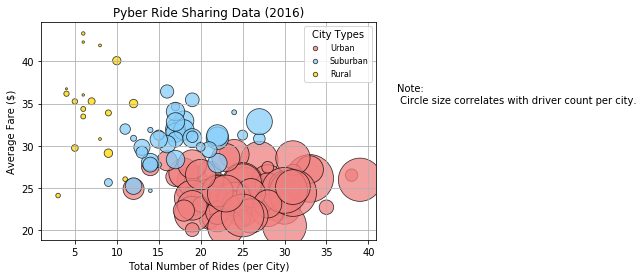

In [5]:
### Obtain the x and y coordinates for each of the three city types
# Filtering the original merged dataframe based on type, then grouping by city

# Urban groupby
urbanCityride = cityride.loc[cityride['type'] == 'Urban', :]
urbanCityrideGrpBy = urbanCityride.groupby(['city'])

# Urban calculations
urbanFare = urbanCityrideGrpBy["fare"].mean()
urbanRide = urbanCityrideGrpBy["ride_id"].count()
urbanDriver = urbanCityrideGrpBy["driver_count"].sum()

#Suburban groupby
suburbanCityride = cityride.loc[cityride['type'] == 'Suburban', :]
suburbanCityrideGrpBy = suburbanCityride.groupby(['city'])

# Suburban calculations
suburbanFare = suburbanCityrideGrpBy["fare"].mean()
suburbanRide = suburbanCityrideGrpBy["ride_id"].count()
suburbanDriver = suburbanCityrideGrpBy["driver_count"].sum()

# Rural groupby
ruralCityride = cityride.loc[cityride['type'] == 'Rural', :]
ruralCityrideGrpBy = ruralCityride.groupby(['city'])

# Rural calculations
ruralFare = ruralCityrideGrpBy["fare"].mean()
ruralRide = ruralCityrideGrpBy["ride_id"].count()
ruralDriver = ruralCityrideGrpBy["driver_count"].sum()


# Build the scatter plots for each type
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

Urban = plt.scatter(urbanRide, urbanFare, marker="o", facecolors="lightcoral", edgecolors="black",
            s=urbanDriver, alpha=0.75, label = 'Urban', linewidths = 0.8)
Suburban = plt.scatter(suburbanRide, suburbanFare, marker="o", facecolors="lightskyblue", edgecolors="black",
            s=suburbanDriver, alpha=0.75, label = 'Suburban', linewidths = 0.8)
Rural = plt.scatter(ruralRide, ruralFare, marker="o", facecolors="gold", edgecolors="black",
            s=ruralDriver, alpha=0.75, label = 'Rural', linewidths = 0.8)

# Create a legend
legend = plt.legend(handles=[Urban, Suburban, Rural], loc="best", title = 'City Types', fontsize = 8)

for legend_handle in legend.legendHandles:
    legend_handle._sizes = [20]
    
# Incorporate a text label regarding circle size
textstr1 = "Note:\n Circle size correlates with driver count per city."
plt.text(0.95, 0.6, textstr1 , fontsize=10, transform=plt.gcf().transFigure)


# Save Figure
plt.savefig('Relationship_between_Rides_Fare_Driverscnt_CityType.png')

# Show Figure
plt.show()

## Total Fares by City Type

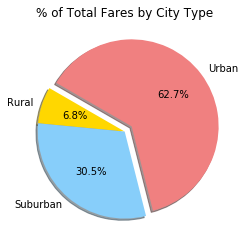

In [3]:
# groupby city
cityTypeGrpBy = cityride.groupby(["type"])

# Calculate Type Percents
ttlFares = cityride["fare"].sum()
prcntTtlFares = cityTypeGrpBy["fare"].sum() / ttlFares * 100


# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)


# titling the pie
plt.title("% of Total Fares by City Type")


# Build Pie Chart
plt.pie(prcntTtlFares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig("FaresByCityType.png")

# Show Figure
plt.show()

## Total Rides by City Type

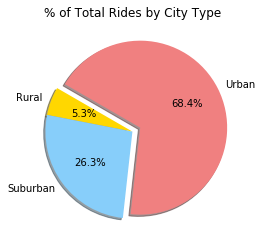

In [4]:
### Calculate Ride Percents
ttlRides = cityride["ride_id"].count()
prcntTtlRides = cityTypeGrpBy["ride_id"].count() / ttlRides * 100

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# titling the pie
plt.title("% of Total Rides by City Type")

# Build Pie Chart
plt.pie(prcntTtlRides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig("RidesByCityType.png")

# Show Figure
plt.show()

## Total Drivers by City Type

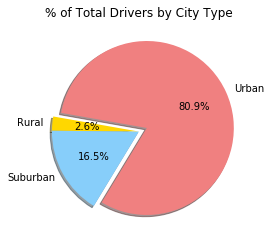

In [5]:
### Calculate Driver Percents

# groupby city from the original city dataframe
cityTypeDFGrpBy = cityDF.groupby(["type"])

ttlDrivers = cityDF["driver_count"].sum()
prcntTtlDrivers = cityTypeDFGrpBy["driver_count"].sum() / ttlDrivers * 100

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# titling the pie
plt.title("% of Total Drivers by City Type")

# Build Pie Chart
plt.pie(prcntTtlDrivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=170)

# Save Figure
plt.savefig("DriverByCityType.png")

# Show Figure
plt.show()